<a href="https://colab.research.google.com/github/viniciusdssilva/mestrado/blob/master/4a_feira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">Aula 3</h1>

## Conteúdo

- Entrada e saída (2): CSV
- Explorando dados: Titanic
- Problema: Calculando estatísticas
- Importando numpy para calcular
- Exibindo gráficos com matplotlib
- Problema: Traçando correlações?
- Importando pandas para analizar os dados
- Problema: Sumarizando os dados
- Problema: Inferência - Quem vai morrer?

## Entrada e saída (2): CSV

Podemos facilitar nosso uso de dados tabulares usando arquivos CSV (Comma Separated Values).
Estes arquivos podem ser produzidos e manipulados usando um editor de planilhas (MS Excel, LibreOffice Calc, ...).

Para praticar, baixem primeiro o arquivo [https://bit.ly/2G9IYvZ](https://bit.ly/2G9IYvZ) (products.csv) para o repositório.


In [0]:
# Para enviar o arquivo para o Google Colab
# Executar esta célula, e enviar o arquivo usando o botão que apareece abaixo

from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
import csv

with open('products.csv') as arq_csv:
    reader = csv.DictReader(arq_csv)
    for linha in reader:
        print(linha['ProductName'], linha['QuantityPerUnit'], linha['UnitPrice'])

<br/><br/><br/><br/>

***

Criando nossa função de leitura:


In [0]:
def read_csv(filepath):
    table = list()  # Tabela é uma lista de linhas
    with open(filepath) as csv_file:
        reader = csv.DictReader(csv_file)
        for row in reader:
            table.append(row)
            
    return table

<br/><br/><br/><br/>

***

<br/>


## Explorando dados: Titanic

Vamos agora explorar alguns dados do famoso desastre náutico, o Titanic

[https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)

Copiar o arquivo train.csv para o repositório.

In [0]:
titanic_tbl = read_csv("train.csv")

## Problema: Calculando estatísticas

Calcule:

1. A idade média dos passageiros do navio.
2. A idade média dos que morreram e dos que sobreviveram.
3. O percentual de passageiros que sobreviveram.

<br/><br/><br/><br/>

***

<br/><br/>


## Importando numpy para calcular

A biblioteca NumPy é bastante utilizada pela comunidade científica para realizar cálculos complexos ou extensos.

Possui funções bastante otimizadas e atende a diversas tarefas matemáticas.

In [0]:
import numpy as np


In [0]:
matriz = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]) 
print(matriz)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [0]:
from numpy import linalg as la

a_vals, a_vecs = la.eig(matriz)  # Autovalores e autovetores da matriz
print(a_vals, end="\n\n")
print(a_vecs)

[ 1.61168440e+01 -1.11684397e+00 -9.75918483e-16]

[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]


Resolvendo as estatísticas com NumPy:

## Importando pandas para analizar os dados

Pandas é uma biblioteca muito usada na análise de dados.

Vejamos algumas de suas funcionalidades.

In [0]:
import pandas as pd

titanic_df = pd.read_csv("train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
name_class_df = titanic_df[["Name", "Pclass"]]
name_class_df.head()

,Name,Pclass
0,"Braund, Mr. Owen Harris",3
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,"Heikkinen, Miss. Laina",3
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
4,"Allen, Mr. William Henry",3


## Problema: Traçando correlações?

Há alguma relação entre a idade, gênero ou classe de passageiros e suas taxas de sobrevivência?

Mostre argumentos estatísticos.

## \[Extra\] Exibindo gráficos com matplotlib

Podemos exibir gráficos no notebook usando a biblioteca matplotlib.

Em código local, os gráfico são salvos em arquivos.

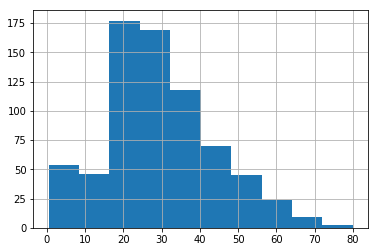

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt

titanic_df["Age"].hist()


In [0]:
class_survivor_df = titanic_df[["Pclass", "Survived"]]
survivors_per_class = class_survivor_df.groupby(by="Pclass", as_index=False)["Survived"].sum() 
survivors_per_class.head()

,Pclass,Survived
0,1,136
1,2,87
2,3,119


In [0]:
num_pasg_per_class = titanic_df.groupby(by="Pclass", as_index=False).count()
num_pasg_per_class["PassengerId"]

0    216
1    184
2    491
Name: PassengerId, dtype: int64

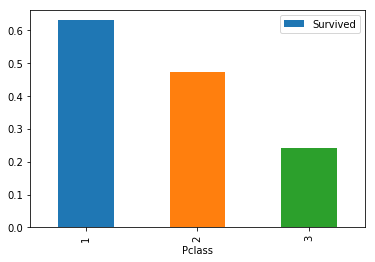

In [0]:
survival_per_class = survivors_per_class.copy()
survival_per_class["NumPassg"] = num_pasg_per_class["PassengerId"]
survival_per_class["Survived"] = survival_per_class["Survived"] / survival_per_class["NumPassg"]
survival_per_class.plot.bar(x="Pclass", y="Survived")

## Problema: Inferência - Quem vai morrer?

Dado um PassengerId, qual a probabilidade de sobrevivência deste passageiro, considerando apenas a idade, gênero, e classe de viagem?